In [1]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
markers=[ '--', '-.', ':', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted']

colors= ["b", "orange", "r", "c", "m", "grey", "black", "violet", "skyblue", "brown", "darkgoldenrod", "khaki", "cornflowerblue", "lightpink", "lime"]

noises=[0.1, 0.2, 0.3, 0.4, 0.15, 0.24, 0.34, 0.44, 0.27, 0.37, 0, 0.13, 0.41, 0.22, 0.33, 0.2]

In [4]:
df = pd.read_csv("temp.csv")
ids = df["Userid"].unique()

print(ids)

headers = []
for col in df:
    headers.append(col)

print(headers)

[158455 313449 351278 446875 453897 483491 494149 547832 738648 773684
 873115 931499 953571]
['Userid', 'Still Morning', 'Still Afternoon', 'Still Evening', 'Still Night', 'Running Morning', 'Running Afternoon', 'Running Evening', 'Running Night', 'ADHD', 'Survey Dates']


In [5]:
dfADHD = df[df["ADHD"]==1]

dfADHD

,Userid,Still Morning,Still Afternoon,Still Evening,Still Night,Running Morning,Running Afternoon,Running Evening,Running Night,ADHD,Survey Dates
0,158455,68.571429,120.023081,318.920895,418.997688,0.000000,0.000000,3.018398,0.000000,1,2022/11/1
1,158455,24.000000,12.000000,132.976853,0.000000,0.000000,0.000000,0.000000,0.000000,1,2022/11/11
2,158455,34.285714,66.038571,249.883936,222.540879,0.000000,0.000000,0.000000,0.000000,1,2022/12/9
3,158455,42.857143,34.285714,274.321250,70.212617,0.000000,0.000000,0.000000,0.000000,1,2022/12/22
4,313449,73.471356,105.978486,196.451306,244.747167,0.000000,4.602561,13.034681,3.333333,1,2022/4/17
5,313449,50.187997,97.971628,166.611919,272.850225,0.000000,0.188094,3.942008,43.333333,1,2022/4/24
6,313449,68.571429,89.281902,161.239521,306.681564,0.000000,1.121371,2.112167,17.142857,1,2022/5/1
7,313449,74.618924,163.943248,266.196633,379.265364,0.000000,1.626083,1.698940,0.000000,1,2022/5/8
8,313449,74.795467,111.399957,248.503762,373.677245,0.000000,3.025238,4.418233,0.000000,1,2022/5/15
9,313449,13.580797,39.865527,99.222907,326.197150,0.000000,0.000000,0.000000,0.000000,1,2022/5/22


In [6]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px

In [7]:
dfADHD['Userid'] = dfADHD['Userid'].astype('category')

#tilt the date on the x-axis!!!!

fig = px.scatter(dfADHD, 
                 x = 'Survey Dates',
                 y = 'Still Morning',
                 template = 'simple_white', 
                hover_name = 'Userid', 
                 color = 'Userid',
                 labels = {"Still Morning": "Morning Still (min)"},
                 title= "Participants with ADHD Morning Still Time")

fig.show()

C:\Users\Ying Zhu\AppData\Local\Temp\ipykernel_14996\3298284790.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfADHD['Userid'] = dfADHD['Userid'].astype('category')


In [8]:
dfPivot = df.melt(id_vars = ['Userid','Survey Dates'], value_vars = ['Still Morning','Still Afternoon', 'Still Evening', 'Still Night', 'Running Morning', 'Running Afternoon', 'Running Evening', 'Running Night'], var_name = 'Activity Kind and When', value_name = 'Duration Time')

dfPivot

,Userid,Survey Dates,Activity Kind and When,Duration Time
0,158455,2022/11/1,Still Morning,68.571429
1,158455,2022/11/11,Still Morning,24.000000
2,158455,2022/12/9,Still Morning,34.285714
3,158455,2022/12/22,Still Morning,42.857143
4,313449,2022/4/17,Still Morning,73.471356
...,...,...,...,...
651,953571,2022/4/29,Running Night,0.000000
652,953571,2022/5/20,Running Night,57.500000
653,953571,2022/5/28,Running Night,0.000000
654,953571,2022/6/10,Running Night,0.000000


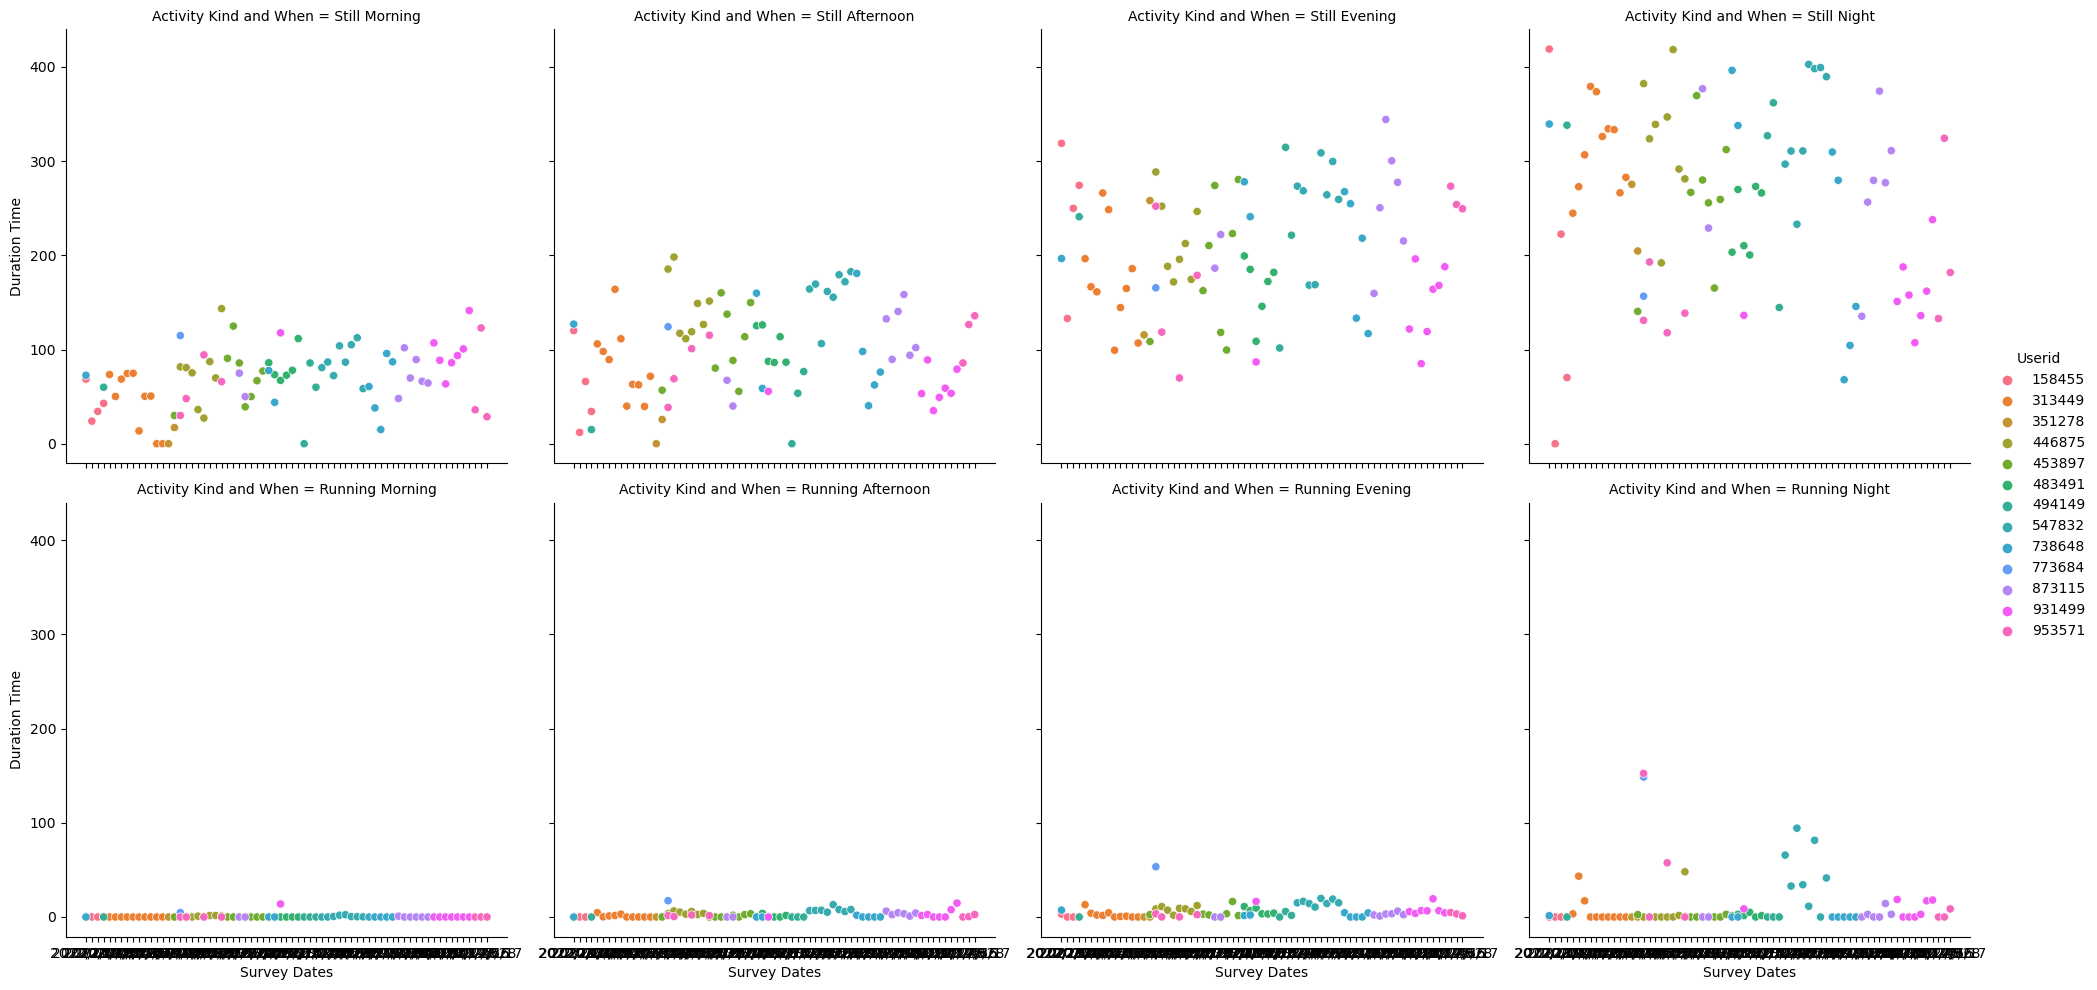

In [9]:
dfPivot['Userid'] = dfPivot['Userid'].astype('category')

sns.relplot(kind = 'scatter',
            x = 'Survey Dates',
            y = 'Duration Time',
            hue = 'Userid',
            col = 'Activity Kind and When', 
            col_wrap = 4,
            data = dfPivot)